<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/wadda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/skywalker0803r/autorch.git

fatal: destination path 'autorch' already exists and is not an empty directory.


In [7]:
from autorch.autorch import transferlearning
import torch
from torch import nn
from torch.autograd import Function
from torch import optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.utils import shuffle
import warnings 
warnings.simplefilter('ignore')

# Load Data

In [8]:
src_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/train_4565.csv',index_col=0))
tgt_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/test_250.csv',index_col=0))

# get columns_name
x_col = ['T10','T50','T90','N+A']
y_col = src_data.drop(x_col,axis=1).columns.tolist()

# split some data for final testing
tgt_data,final_test_data = tgt_data.iloc[:200],tgt_data.iloc[200:]

# instance WADDA model

In [9]:
src_x,src_y = src_data[x_col],src_data[y_col]
tgt_x,tgt_y = tgt_data[x_col],tgt_data[y_col]
model = transferlearning.WADDA(src_x,src_y,tgt_x,tgt_y)

# Fit Xgboost

In [10]:
xgb_200 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(tgt_x,tgt_y)
xgb_4765 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(src_x.append(tgt_x),src_y.append(tgt_y))

# Fit WADDA

  0%|          | 0/3000 [00:00<?, ?it/s]

start train


  1%|▏         | 39/3000 [00:00<08:22,  5.89it/s]

ep:0 loss:3.852004051208496


  5%|▌         | 159/3000 [00:00<02:50, 16.69it/s]

ep:100 loss:3.2374160289764404


  9%|▉         | 273/3000 [00:00<01:00, 44.91it/s]

ep:200 loss:1.220056176185608


 12%|█▏        | 349/3000 [00:01<00:32, 81.52it/s]

ep:300 loss:0.9345071315765381


 15%|█▌        | 464/3000 [00:01<00:15, 168.72it/s]

ep:400 loss:0.7948161959648132


 18%|█▊        | 544/3000 [00:01<00:10, 237.98it/s]

ep:500 loss:0.6071462035179138


 22%|██▏       | 659/3000 [00:01<00:07, 309.10it/s]

ep:600 loss:0.49471157789230347


 24%|██▍       | 734/3000 [00:02<00:07, 319.53it/s]

ep:700 loss:0.45441725850105286


 28%|██▊       | 840/3000 [00:02<00:06, 332.03it/s]

ep:800 loss:0.40917155146598816


 32%|███▏      | 949/3000 [00:02<00:06, 339.42it/s]

ep:900 loss:0.3363942801952362


 35%|███▌      | 1060/3000 [00:03<00:05, 354.82it/s]

ep:1000 loss:0.3465229272842407


 39%|███▉      | 1170/3000 [00:03<00:05, 358.74it/s]

ep:1100 loss:0.4411408007144928


 41%|████▏     | 1242/3000 [00:03<00:05, 344.36it/s]

ep:1200 loss:0.33599990606307983


 45%|████▌     | 1351/3000 [00:03<00:04, 351.55it/s]

ep:1300 loss:0.38366127014160156


 49%|████▊     | 1461/3000 [00:04<00:04, 356.71it/s]

ep:1400 loss:0.3421289920806885


 52%|█████▏    | 1574/3000 [00:04<00:03, 365.29it/s]

ep:1500 loss:0.24367627501487732


 55%|█████▍    | 1647/3000 [00:04<00:03, 351.88it/s]

ep:1600 loss:0.344691663980484


 59%|█████▊    | 1758/3000 [00:05<00:03, 362.40it/s]

ep:1700 loss:0.27051711082458496


 62%|██████▏   | 1869/3000 [00:05<00:03, 358.23it/s]

ep:1800 loss:0.28058648109436035


 65%|██████▍   | 1942/3000 [00:05<00:02, 360.47it/s]

ep:1900 loss:0.261726975440979


 68%|██████▊   | 2051/3000 [00:05<00:02, 350.96it/s]

ep:2000 loss:0.21741341054439545


 72%|███████▏  | 2161/3000 [00:06<00:02, 352.88it/s]

ep:2100 loss:0.2695503234863281


 76%|███████▌  | 2270/3000 [00:06<00:02, 357.93it/s]

ep:2200 loss:0.2565261423587799


 78%|███████▊  | 2344/3000 [00:06<00:01, 363.08it/s]

ep:2300 loss:0.39185377955436707


 82%|████████▏ | 2459/3000 [00:07<00:01, 369.46it/s]

ep:2400 loss:0.2147296667098999


 86%|████████▌ | 2570/3000 [00:07<00:01, 367.63it/s]

ep:2500 loss:0.22309038043022156


 88%|████████▊ | 2645/3000 [00:07<00:00, 365.97it/s]

ep:2600 loss:0.22761428356170654


 92%|█████████▏| 2759/3000 [00:07<00:00, 353.97it/s]

ep:2700 loss:0.26030659675598145


 96%|█████████▌| 2873/3000 [00:08<00:00, 368.36it/s]

ep:2800 loss:0.2261139154434204


 98%|█████████▊| 2948/3000 [00:08<00:00, 365.50it/s]

ep:2900 loss:0.2684665620326996


100%|██████████| 3000/3000 [00:08<00:00, 350.54it/s]


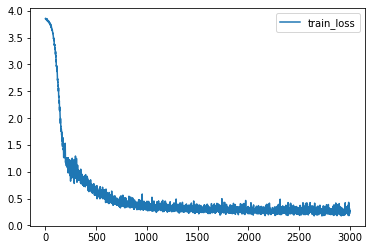

  0%|          | 24/10000 [00:00<01:30, 109.66it/s]

ep:0 d_loss:0.005383852869272232 t_loss:0.01670045033097267 r_loss:2.7762205600738525


  1%|          | 121/10000 [00:01<01:24, 117.07it/s]

ep:100 d_loss:-0.1838778853416443 t_loss:-0.4970236122608185 r_loss:1.4083998203277588


  2%|▏         | 222/10000 [00:01<01:20, 121.01it/s]

ep:200 d_loss:-0.021237879991531372 t_loss:-0.42503228783607483 r_loss:1.1369853019714355


  3%|▎         | 313/10000 [00:02<01:19, 121.13it/s]

ep:300 d_loss:-0.05997980386018753 t_loss:-0.04537396878004074 r_loss:1.0997345447540283


  4%|▍         | 415/10000 [00:03<01:22, 116.19it/s]

ep:400 d_loss:-0.0657057911157608 t_loss:0.06131953001022339 r_loss:0.8444976806640625


  5%|▌         | 518/10000 [00:04<01:18, 120.03it/s]

ep:500 d_loss:-0.03502105176448822 t_loss:-0.06900666654109955 r_loss:0.756873607635498


  6%|▌         | 620/10000 [00:05<01:20, 116.98it/s]

ep:600 d_loss:-0.05226033553481102 t_loss:-0.05000293627381325 r_loss:0.845319390296936


  7%|▋         | 718/10000 [00:06<01:19, 116.81it/s]

ep:700 d_loss:-0.04928472638130188 t_loss:0.03994884341955185 r_loss:0.7391834855079651


  8%|▊         | 814/10000 [00:06<01:20, 114.41it/s]

ep:800 d_loss:-0.06046130880713463 t_loss:0.012986254878342152 r_loss:0.7337613105773926


  9%|▉         | 923/10000 [00:07<01:18, 115.14it/s]

ep:900 d_loss:-0.045487113296985626 t_loss:-0.06250694394111633 r_loss:0.6410034894943237


 10%|█         | 1019/10000 [00:08<01:18, 115.04it/s]

ep:1000 d_loss:-0.045293472707271576 t_loss:-0.012327674776315689 r_loss:0.6122285723686218


 11%|█         | 1117/10000 [00:09<01:16, 116.00it/s]

ep:1100 d_loss:-0.053043387830257416 t_loss:-0.001457730308175087 r_loss:0.6580896973609924


 12%|█▏        | 1215/10000 [00:10<01:16, 115.23it/s]

ep:1200 d_loss:-0.04727421700954437 t_loss:-0.02050432376563549 r_loss:0.5073233842849731


 13%|█▎        | 1312/10000 [00:11<01:15, 115.76it/s]

ep:1300 d_loss:-0.05746282637119293 t_loss:0.01959330029785633 r_loss:0.6001541018486023


 14%|█▍        | 1420/10000 [00:12<01:14, 115.54it/s]

ep:1400 d_loss:-0.04927081987261772 t_loss:-0.046965308487415314 r_loss:0.554914653301239


 15%|█▌        | 1518/10000 [00:13<01:12, 117.13it/s]

ep:1500 d_loss:-0.054405372589826584 t_loss:0.003953801468014717 r_loss:0.5944156050682068


 16%|█▌        | 1616/10000 [00:13<01:12, 115.97it/s]

ep:1600 d_loss:-0.0551062636077404 t_loss:-0.0031067528761923313 r_loss:0.6495724320411682


 17%|█▋        | 1713/10000 [00:14<01:11, 116.58it/s]

ep:1700 d_loss:-0.05678970366716385 t_loss:-0.016894303262233734 r_loss:0.5283480882644653


 18%|█▊        | 1822/10000 [00:15<01:15, 108.33it/s]

ep:1800 d_loss:-0.051266174763441086 t_loss:-0.012210149317979813 r_loss:0.5120110511779785


 19%|█▉        | 1918/10000 [00:16<01:11, 113.22it/s]

ep:1900 d_loss:-0.052673496305942535 t_loss:-0.013536229729652405 r_loss:0.5745877623558044


 20%|██        | 2015/10000 [00:17<01:10, 113.56it/s]

ep:2000 d_loss:-0.05340071767568588 t_loss:-0.003749222494661808 r_loss:0.5532968640327454


 21%|██        | 2124/10000 [00:18<01:07, 117.07it/s]

ep:2100 d_loss:-0.04801313579082489 t_loss:-0.03309175372123718 r_loss:0.5115231871604919


 22%|██▏       | 2221/10000 [00:19<01:07, 115.85it/s]

ep:2200 d_loss:-0.0522615946829319 t_loss:0.014833363704383373 r_loss:0.5253459215164185


 23%|██▎       | 2317/10000 [00:20<01:06, 115.50it/s]

ep:2300 d_loss:-0.03910825029015541 t_loss:-0.04938369616866112 r_loss:0.49354955554008484


 24%|██▍       | 2413/10000 [00:20<01:07, 111.65it/s]

ep:2400 d_loss:-0.05068448185920715 t_loss:-0.005203003995120525 r_loss:0.5147485136985779


 25%|██▌       | 2522/10000 [00:21<01:06, 111.65it/s]

ep:2500 d_loss:-0.04048356041312218 t_loss:-0.043342940509319305 r_loss:0.4808494746685028


 26%|██▌       | 2618/10000 [00:22<01:07, 110.01it/s]

ep:2600 d_loss:-0.05820940434932709 t_loss:0.03466734662652016 r_loss:0.4876915514469147


 27%|██▋       | 2715/10000 [00:23<01:03, 114.09it/s]

ep:2700 d_loss:-0.050467539578676224 t_loss:-0.022946378216147423 r_loss:0.46004971861839294


 28%|██▊       | 2816/10000 [00:24<00:59, 119.99it/s]

ep:2800 d_loss:-0.05228594318032265 t_loss:-0.01011511031538248 r_loss:0.4287782609462738


 29%|██▉       | 2915/10000 [00:25<01:01, 116.05it/s]

ep:2900 d_loss:-0.053439199924468994 t_loss:-0.011838147416710854 r_loss:0.4786953032016754


 30%|███       | 3025/10000 [00:26<00:59, 117.78it/s]

ep:3000 d_loss:-0.058469753712415695 t_loss:0.0032768913079053164 r_loss:0.5010596513748169


 31%|███       | 3121/10000 [00:27<00:59, 115.93it/s]

ep:3100 d_loss:-0.04929361492395401 t_loss:-0.01658511348068714 r_loss:0.4385191798210144


 32%|███▏      | 3217/10000 [00:27<00:59, 114.18it/s]

ep:3200 d_loss:-0.05345046892762184 t_loss:0.00114363431930542 r_loss:0.46324622631073


 33%|███▎      | 3314/10000 [00:28<01:00, 109.76it/s]

ep:3300 d_loss:-0.05075995251536369 t_loss:-0.02826489694416523 r_loss:0.46329352259635925


 34%|███▍      | 3422/10000 [00:29<00:58, 112.77it/s]

ep:3400 d_loss:-0.05039655417203903 t_loss:-0.008787158876657486 r_loss:0.4556431174278259


 35%|███▌      | 3518/10000 [00:30<00:58, 111.34it/s]

ep:3500 d_loss:-0.050650183111429214 t_loss:-0.015081067569553852 r_loss:0.39403924345970154


 36%|███▌      | 3614/10000 [00:31<00:55, 114.97it/s]

ep:3600 d_loss:-0.05947919189929962 t_loss:0.014707350172102451 r_loss:0.4227754771709442


 37%|███▋      | 3712/10000 [00:32<00:55, 113.23it/s]

ep:3700 d_loss:-0.051989033818244934 t_loss:-0.0010432763956487179 r_loss:0.4476875364780426


 38%|███▊      | 3821/10000 [00:33<00:53, 115.89it/s]

ep:3800 d_loss:-0.05467870458960533 t_loss:-0.00897199660539627 r_loss:0.3983176648616791


 39%|███▉      | 3917/10000 [00:34<00:52, 115.03it/s]

ep:3900 d_loss:-0.05486394092440605 t_loss:0.0010161675745621324 r_loss:0.41356998682022095


 40%|████      | 4013/10000 [00:34<00:51, 115.20it/s]

ep:4000 d_loss:-0.05656670406460762 t_loss:-0.005484829191118479 r_loss:0.4512207508087158


 41%|████      | 4122/10000 [00:35<00:51, 113.89it/s]

ep:4100 d_loss:-0.051267825067043304 t_loss:-0.010886253789067268 r_loss:0.35229939222335815


 42%|████▏     | 4218/10000 [00:36<00:50, 113.80it/s]

ep:4200 d_loss:-0.05056554079055786 t_loss:-0.011700672097504139 r_loss:0.44954589009284973


 43%|████▎     | 4314/10000 [00:37<00:49, 115.10it/s]

ep:4300 d_loss:-0.0546320378780365 t_loss:-0.001182088046334684 r_loss:0.4102945029735565


 44%|████▍     | 4423/10000 [00:38<00:48, 115.57it/s]

ep:4400 d_loss:-0.05239215865731239 t_loss:-0.0104657718911767 r_loss:0.3940838873386383


 45%|████▌     | 4521/10000 [00:39<00:46, 116.79it/s]

ep:4500 d_loss:-0.04924597963690758 t_loss:-0.032544903457164764 r_loss:0.3985154926776886


 46%|████▌     | 4617/10000 [00:40<00:48, 111.69it/s]

ep:4600 d_loss:-0.05559190735220909 t_loss:0.0049238046631217 r_loss:0.4411754310131073


 47%|████▋     | 4717/10000 [00:40<00:44, 117.57it/s]

ep:4700 d_loss:-0.04915406554937363 t_loss:-0.030865352600812912 r_loss:0.3654576539993286


 48%|████▊     | 4815/10000 [00:41<00:44, 117.00it/s]

ep:4800 d_loss:-0.056980397552251816 t_loss:0.016228437423706055 r_loss:0.4223061501979828


 49%|████▉     | 4924/10000 [00:42<00:44, 114.32it/s]

ep:4900 d_loss:-0.0518186017870903 t_loss:-0.021041423082351685 r_loss:0.37059420347213745


 50%|█████     | 5023/10000 [00:43<00:42, 117.29it/s]

ep:5000 d_loss:-0.05079280957579613 t_loss:-0.016216667369008064 r_loss:0.4334218502044678


 51%|█████     | 5122/10000 [00:44<00:41, 116.67it/s]

ep:5100 d_loss:-0.05385594069957733 t_loss:0.0036228890530765057 r_loss:0.36857423186302185


 52%|█████▏    | 5222/10000 [00:45<00:41, 115.62it/s]

ep:5200 d_loss:-0.05478890612721443 t_loss:0.002188872080296278 r_loss:0.41831398010253906


 53%|█████▎    | 5320/10000 [00:46<00:39, 117.40it/s]

ep:5300 d_loss:-0.04938901960849762 t_loss:-0.016059085726737976 r_loss:0.39298883080482483


 54%|█████▍    | 5416/10000 [00:47<00:41, 110.87it/s]

ep:5400 d_loss:-0.05033222213387489 t_loss:-0.008084888570010662 r_loss:0.3666086196899414


 55%|█████▌    | 5514/10000 [00:47<00:38, 117.68it/s]

ep:5500 d_loss:-0.05833512544631958 t_loss:-0.007838443852961063 r_loss:0.37481021881103516


 56%|█████▌    | 5623/10000 [00:48<00:37, 116.35it/s]

ep:5600 d_loss:-0.05470593273639679 t_loss:-0.007440218236297369 r_loss:0.3926965892314911


 57%|█████▋    | 5720/10000 [00:49<00:36, 116.85it/s]

ep:5700 d_loss:-0.05146297439932823 t_loss:-0.0037304507568478584 r_loss:0.38708221912384033


 58%|█████▊    | 5817/10000 [00:50<00:36, 114.43it/s]

ep:5800 d_loss:-0.050747066736221313 t_loss:-0.013311407528817654 r_loss:0.4175031781196594


 59%|█████▉    | 5913/10000 [00:51<00:35, 115.42it/s]

ep:5900 d_loss:-0.04774497449398041 t_loss:-0.02187509648501873 r_loss:0.38741979002952576


 60%|██████    | 6021/10000 [00:52<00:34, 114.11it/s]

ep:6000 d_loss:-0.05329734459519386 t_loss:-0.014998684637248516 r_loss:0.40025320649147034


 61%|██████    | 6117/10000 [00:53<00:34, 112.81it/s]

ep:6100 d_loss:-0.05201977863907814 t_loss:0.004622165113687515 r_loss:0.3553713858127594


 62%|██████▏   | 6213/10000 [00:53<00:33, 114.42it/s]

ep:6200 d_loss:-0.05110856518149376 t_loss:-0.023974664509296417 r_loss:0.3653567433357239


 63%|██████▎   | 6321/10000 [00:54<00:31, 115.40it/s]

ep:6300 d_loss:-0.06264575570821762 t_loss:0.016518648713827133 r_loss:0.3882654309272766


 64%|██████▍   | 6417/10000 [00:55<00:31, 115.37it/s]

ep:6400 d_loss:-0.04781024903059006 t_loss:-0.02578859217464924 r_loss:0.3991038203239441


 65%|██████▌   | 6514/10000 [00:56<00:30, 113.88it/s]

ep:6500 d_loss:-0.051092758774757385 t_loss:-0.010962137952446938 r_loss:0.4107479453086853


 66%|██████▌   | 6622/10000 [00:57<00:29, 114.47it/s]

ep:6600 d_loss:-0.05929466336965561 t_loss:0.0003008990315720439 r_loss:0.37338581681251526


 67%|██████▋   | 6718/10000 [00:58<00:29, 112.26it/s]

ep:6700 d_loss:-0.05681462585926056 t_loss:0.00289173424243927 r_loss:0.3839071989059448


 68%|██████▊   | 6814/10000 [00:59<00:28, 113.23it/s]

ep:6800 d_loss:-0.05045161023736 t_loss:-0.005698993802070618 r_loss:0.3765115737915039


 69%|██████▉   | 6922/10000 [01:00<00:27, 111.37it/s]

ep:6900 d_loss:-0.05468638986349106 t_loss:0.005618236027657986 r_loss:0.35556888580322266


 70%|███████   | 7018/10000 [01:01<00:26, 114.64it/s]

ep:7000 d_loss:-0.05095379799604416 t_loss:-0.03265000134706497 r_loss:0.37265917658805847


 71%|███████   | 7114/10000 [01:01<00:24, 116.49it/s]

ep:7100 d_loss:-0.05372331291437149 t_loss:-0.011715811677277088 r_loss:0.36106985807418823


 72%|███████▏  | 7222/10000 [01:02<00:24, 115.11it/s]

ep:7200 d_loss:-0.05711629241704941 t_loss:-0.0008823024109005928 r_loss:0.3885840177536011


 73%|███████▎  | 7318/10000 [01:03<00:23, 113.37it/s]

ep:7300 d_loss:-0.05201012268662453 t_loss:-0.00896280724555254 r_loss:0.37142711877822876


 74%|███████▍  | 7414/10000 [01:04<00:23, 112.05it/s]

ep:7400 d_loss:-0.053072527050971985 t_loss:-0.017929604277014732 r_loss:0.3644025921821594


 75%|███████▌  | 7523/10000 [01:05<00:21, 115.53it/s]

ep:7500 d_loss:-0.05223310738801956 t_loss:-0.01412460207939148 r_loss:0.34353429079055786


 76%|███████▌  | 7619/10000 [01:06<00:21, 111.19it/s]

ep:7600 d_loss:-0.058357879519462585 t_loss:0.006276230793446302 r_loss:0.40070515871047974


 77%|███████▋  | 7715/10000 [01:07<00:19, 116.77it/s]

ep:7700 d_loss:-0.05140906199812889 t_loss:-0.013658992014825344 r_loss:0.36948105692863464


 78%|███████▊  | 7824/10000 [01:08<00:19, 114.03it/s]

ep:7800 d_loss:-0.05296801030635834 t_loss:-0.0137374522164464 r_loss:0.3689517676830292


 79%|███████▉  | 7920/10000 [01:08<00:18, 115.41it/s]

ep:7900 d_loss:-0.05118655040860176 t_loss:-0.008189957588911057 r_loss:0.3875963091850281


 80%|████████  | 8016/10000 [01:09<00:17, 112.67it/s]

ep:8000 d_loss:-0.05097019299864769 t_loss:-0.003180574392899871 r_loss:0.4125787913799286


 81%|████████  | 8124/10000 [01:10<00:16, 114.65it/s]

ep:8100 d_loss:-0.047855641692876816 t_loss:-0.030092496424913406 r_loss:0.3942195773124695


 82%|████████▏ | 8220/10000 [01:11<00:16, 110.88it/s]

ep:8200 d_loss:-0.04638529196381569 t_loss:-0.0356312170624733 r_loss:0.3610799312591553


 83%|████████▎ | 8316/10000 [01:12<00:14, 113.54it/s]

ep:8300 d_loss:-0.05571753531694412 t_loss:0.0013551587471738458 r_loss:0.3888087868690491


 84%|████████▍ | 8412/10000 [01:13<00:14, 111.39it/s]

ep:8400 d_loss:-0.05398174375295639 t_loss:-0.0006743993144482374 r_loss:0.34409675002098083


 85%|████████▌ | 8520/10000 [01:14<00:13, 113.18it/s]

ep:8500 d_loss:-0.050390735268592834 t_loss:-0.033167626708745956 r_loss:0.388693243265152


 86%|████████▌ | 8616/10000 [01:15<00:12, 110.64it/s]

ep:8600 d_loss:-0.05386032164096832 t_loss:-0.010787172242999077 r_loss:0.35849952697753906


 87%|████████▋ | 8724/10000 [01:16<00:11, 115.93it/s]

ep:8700 d_loss:-0.0504801906645298 t_loss:-0.0067273471504449844 r_loss:0.35707226395606995


 88%|████████▊ | 8820/10000 [01:16<00:10, 115.45it/s]

ep:8800 d_loss:-0.05089281499385834 t_loss:-0.010986841283738613 r_loss:0.32786256074905396


 89%|████████▉ | 8915/10000 [01:17<00:09, 110.85it/s]

ep:8900 d_loss:-0.05351094901561737 t_loss:-0.00701906019821763 r_loss:0.3440592288970947


 90%|█████████ | 9023/10000 [01:18<00:08, 114.33it/s]

ep:9000 d_loss:-0.052046213299036026 t_loss:-0.010730838403105736 r_loss:0.37195733189582825


 91%|█████████ | 9119/10000 [01:19<00:07, 114.86it/s]

ep:9100 d_loss:-0.050877999514341354 t_loss:-0.016897467896342278 r_loss:0.3614279627799988


 92%|█████████▏| 9216/10000 [01:20<00:06, 112.58it/s]

ep:9200 d_loss:-0.0489368811249733 t_loss:-0.03149968385696411 r_loss:0.38533496856689453


 93%|█████████▎| 9324/10000 [01:21<00:06, 112.25it/s]

ep:9300 d_loss:-0.050575193017721176 t_loss:-0.01179218478500843 r_loss:0.3522062301635742


 94%|█████████▍| 9421/10000 [01:22<00:05, 114.46it/s]

ep:9400 d_loss:-0.05131876468658447 t_loss:-0.011982460506260395 r_loss:0.3373314440250397


 95%|█████████▌| 9517/10000 [01:23<00:04, 115.68it/s]

ep:9500 d_loss:-0.05526800453662872 t_loss:0.003774105804041028 r_loss:0.37379181385040283


 96%|█████████▌| 9613/10000 [01:23<00:03, 114.90it/s]

ep:9600 d_loss:-0.05004512146115303 t_loss:-0.020934835076332092 r_loss:0.36548134684562683


 97%|█████████▋| 9721/10000 [01:24<00:02, 111.24it/s]

ep:9700 d_loss:-0.05104764923453331 t_loss:-0.029966892674565315 r_loss:0.3724062144756317


 98%|█████████▊| 9817/10000 [01:25<00:01, 113.74it/s]

ep:9800 d_loss:-0.04711374640464783 t_loss:-0.021953562274575233 r_loss:0.36560627818107605


 99%|█████████▉| 9915/10000 [01:26<00:00, 115.79it/s]

ep:9900 d_loss:-0.048787862062454224 t_loss:-0.015516713261604309 r_loss:0.35283249616622925


100%|██████████| 10000/10000 [01:27<00:00, 114.55it/s]


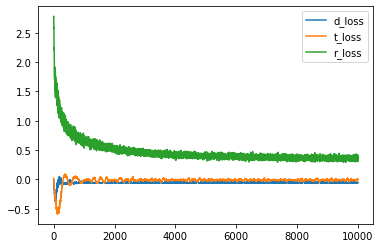

end train


In [11]:
model.train()

# model predict

In [12]:
x_test = final_test_data[x_col]
y_test = final_test_data[y_col]

In [13]:
adda_y_hat = model.predict(x_test)
xgb_200_y_hat = pd.DataFrame(xgb_200.predict(x_test),columns=y_col)
xgb_4765_y_hat = pd.DataFrame(xgb_4765.predict(x_test),columns=y_col)

# evaluate

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_metrics(y_pred,y_real):
  res = pd.DataFrame(index=y_pred.columns,columns=['R2','RMSE','MAPE'])
  for i in y_pred.columns:
    res.loc[i,'R2'] = r2_score(y_real[i],y_pred[i])
    res.loc[i,'RMSE'] = np.sqrt(mean_squared_error(y_real[i],y_pred[i]))
    res.loc[i,'MAPE'] = mape(y_real[i],y_pred[i])
  res.loc['AVG'] = res.mean(axis=0)
  return res

In [15]:
adda_res = show_metrics(adda_y_hat,y_test)
adda_res

,R2,RMSE,MAPE
C5NP,0.97096,0.678474,133.719
C5IP,0.946441,0.660251,156.883
C5N,0.959295,0.0670634,inf
C6NP,0.902106,0.691951,193.7
C6IP,0.947318,0.633209,313.676
C6N,0.74267,1.16382,22.277
C6A,0.894966,0.381205,79.9405
C7NP,0.808022,0.539564,7.50759
C7IP,0.712255,0.902709,11.659
C7N,0.93244,1.46779,7.4214


In [16]:
xgb_200_res = show_metrics(xgb_200_y_hat,y_test)
xgb_200_res

,R2,RMSE,MAPE
C5NP,-0.40302,4.71594,301.782
C5IP,-0.508295,3.50378,305.288
C5N,-0.658369,0.428056,inf
C6NP,-1.03305,3.15334,383.258
C6IP,-1.11798,4.01492,518.032
C6N,-2.63727,4.37552,66.341
C6A,-0.344394,1.36382,158.296
C7NP,-3.17324,2.51567,39.1575
C7IP,-0.152868,1.8069,23.3629
C7N,-3.03899,11.3489,82.6034


In [17]:
xgb_4765_res = show_metrics(xgb_4765_y_hat,y_test)
xgb_4765_res

,R2,RMSE,MAPE
C5NP,-0.33968,4.60826,359.784
C5IP,-0.387211,3.3602,511.228
C5N,-0.784089,0.443985,inf
C6NP,-1.08413,3.19271,369.561
C6IP,-0.787834,3.68875,774.755
C6N,-2.50258,4.29374,65.4082
C6A,-12.2616,4.28341,2284.08
C7NP,-4.224,2.81462,44.9428
C7IP,-2.14238,2.98314,41.0516
C7N,-2.59343,10.7046,50.9809


In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='WADDA', x=y_col, y=adda_res['RMSE']),
    go.Bar(name='XGB_200', x=y_col, y=xgb_200_res['RMSE']),
    go.Bar(name='XGB_4765', x=y_col ,y=xgb_4765_res['RMSE']),
])
# Change the bar mode
fig.update_layout(barmode='group',title='RMSE')
fig.show()

In [ ]:
\